In [1]:
# download the train dataset
import requests
import numpy as np
r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')

# load the train dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X_train,y_train = load_svmlight_file(f=BytesIO(r.content), n_features=123)#y读取了数据样本标签值，x读取了数据中的属性值
X_train=X_train.toarray()
y_train=y_train.reshape((-1,1))#从(32561,)变为（32561，1）即：从向量变为矩阵
train_sample_num,n_features=X_train.shape
X_train = np.column_stack((np.ones((train_sample_num, 1)),X_train))#添加一列全1，作为偏置列

In [2]:
#download the testing dataset
r_t=requests.get('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t')
X_val,y_val=load_svmlight_file(f=BytesIO(r_t.content),n_features=123)
X_val=X_val.toarray()
y_val=y_val.reshape((-1,1))
val_sample_num,n_features=X_val.shape
X_val = np.column_stack((np.ones((val_sample_num, 1)),X_val))#添加一列全1，作为偏置列
X_val.shape

(16281, 124)

In [3]:
#initialize the w parameter
import random
# select different initializing method
w = np.zeros((n_features+1, 1))  # initialize with zeros
# w = np.random.random((n_features+1, 1))  # initialize with random numbers
# w = np.random.normal(1, 1, size=(n_features+1, 1))  # initialize with zero normal distribution

In [4]:
#define the superparameter
batch_size=120
epoch=200
learning_rate=0.0005
C=0.5
threshold=0

Lvalidation=[]

In [5]:
#train
for i in range(epoch):
    random_index=np.arange(train_sample_num)
    np.random.shuffle(random_index)

    add_grad=np.zeros((n_features+1,1))
    for j in range(batch_size):
        X_j=X_train[random_index[j]].reshape((-1,1))#X[j]是一个向量，要使用reshape把（124，）转为（124，1）的矩阵
        y_j=y_train[random_index[j]].reshape((-1,1))
        if((1-y_j*np.dot(w.T,X_j))>=0):      
            add_grad+=-y_j*X_j
        else:
            add_grad+=np.zeros((n_features+1,1))
    grad=-(C/batch_size)*add_grad
    grad=grad.reshape((-1,1))
    w+=learning_rate*grad
    
    hinge_add_loss=np.zeros((1,1))
    for k in range(batch_size):
        X_k=X_val[k].reshape((-1,1))#X[j]是一个向量，要使用reshape把（124，）转为（124，1）矩阵
        y_k=y_val[k].reshape((-1,1))
        if((1-y_k*np.dot(w.T,X_k))>=0):
            hinge_add_loss+=1-y_k*np.dot(w.T,X_k)
        else:
            hinge_add_loss+=np.zeros((1,1))
    loss=0.5*np.square(np.linalg.norm(w))+(C/batch_size)*hinge_add_loss[0]
    Lvalidation.append(loss)

In [6]:
#evaluation
random_index=np.arange(X_val.shape[0])
np.random.shuffle(random_index)
hit=0
test_size=1200
for i in range(test_size):
    X=X_val[random_index[i]].reshape((-1,1))
    y=y_val[random_index[i]].reshape((-1,1))
    p=np.dot(w.T,X)
    if p[0][0]>=threshold and y[0][0]==1:
        hit+=1
    elif p[0][0]<threshold and y[0][0]==-1:
        hit+=1
print("准确率：{:.2f}%".format((hit/test_size)*100))

准确率：74.42%


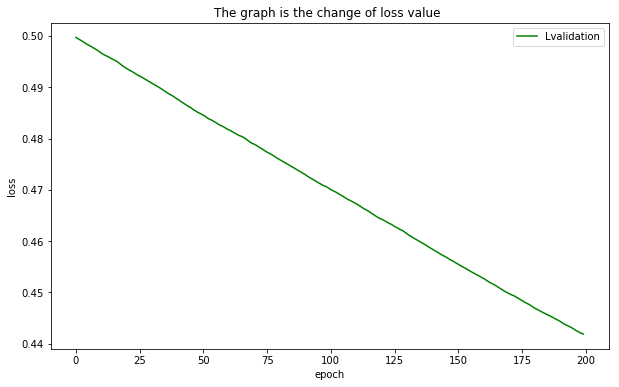

In [7]:
%matplotlib inline 
#只在notebook中才有用，意思是在直接python console里面生成图像

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Lvalidation, "-", color="g", label="Lvalidation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph is the change of loss value ")